In [36]:
using Plots, CSV, FFTW

In [4]:
function getFloatTimes(dataList)
    timeList=zeros(length(dataList)-7) #-7 because 1st 7 are bs
    for i=8:length(dataList) #real data starts at 8
        dat=dataList[i]
        time=parse.(Float64,dat[8:27]) #this is always where time values are
        timeList[i-7]=time #-7 to get back to 1
    end
    return timeList
end

getFloatTimes (generic function with 1 method)

In [5]:
data=readlines("10985_src_6.times")

105-element Array{String,1}:
 " "                                                                               
 "--------------------------------------------------------------------------------"
 "Data for Table Block EVENTS"                                                     
 "--------------------------------------------------------------------------------"
 " "                                                                               
 "ROW    time                 pi     sky(x,y)"                                     
 " "                                                                               
 "     1 386460317.4498513341     63 (     3889.441406250,     3985.8625488281)"   
 "     2 386460469.7817222476    315   (     3891.2502441406,     3984.56250)"     
 "     3 386460541.0860164165    133 (     3891.7145996094,     3983.4042968750)"  
 "     4 386460677.2123438716     97 (     3891.6271972656,     3984.2441406250)"  
 "     5 386460729.0700021982    373 (     3891

In [6]:
times=getFloatTimes(data)

98-element Array{Float64,1}:
 3.8646031744985133e8
 3.8646046978172225e8
 3.864605410860164e8 
 3.864606772123439e8 
 3.864607290700022e8 
 3.864608587141288e8 
 3.864610304925824e8 
 3.864612055121391e8 
 3.8646134487959355e8
 3.8646139673725414e8
 3.8646145183603615e8
 3.864615685157436e8 
 3.864616171323136e8 
 ⋮                   
 3.864690392616457e8 
 3.8646924669238186e8
 3.864694800519348e8 
 3.864695740439815e8 
 3.864696032139285e8 
 3.864696388660717e8 
 3.864696939648729e8 
 3.8647009586191326e8
 3.864701315140475e8 
 3.8647016716622186e8
 3.864702093005726e8 
 3.864702449527371e8 

In [7]:
timeDel=3.24112

3.24112

In [28]:
dur=maximum(times)-minimum(times)
rescaledTimes=zeros(length(times))
for i=1:length(rescaledTimes)
    rescaledTimes[i]=times[i]-minimum(times)
end
indList=[]
for time in rescaledTimes
    push!(indList,floor(time%10)+1) #10 bins, +1 because julia indexing starts at 1, floor to make int
end

In [31]:
bins=zeros(10)
for i=1:length(indList)
    ind=Int(indList[i])
    bins[ind]+=1
end
    

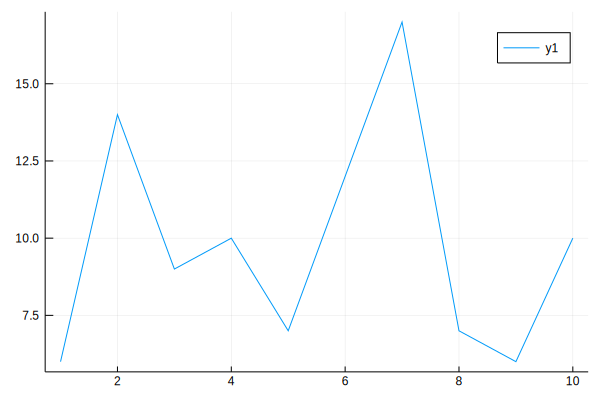

In [35]:
plot(bins)

In [37]:
f=rfft(bins)

6-element Array{Complex{Float64},1}:
               98.0 + 0.0im              
 -6.618033988749895 - 2.179627584016082im
  6.944271909999159 - 13.31479122813215im
 -4.381966011250105 + 9.23305061152576im 
 -10.94427190999916 - 8.228993532094623im
               -8.0 + 0.0im              

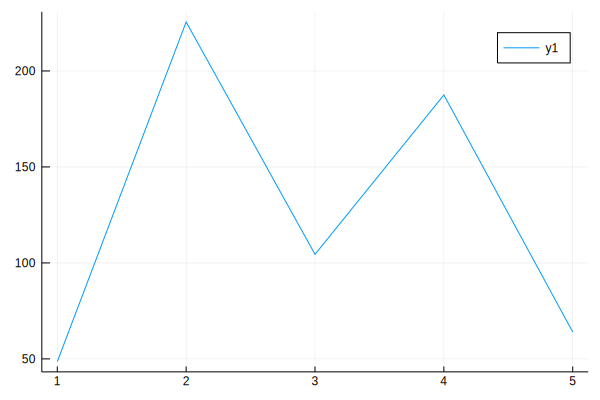

In [41]:
plot(abs.(f[2:end].^2))

In [44]:
src=CSV.read("/home/kirk/Documents/research/CHANDRATest/obsid_src_test.txt",header=false)

,Column1,Column2
,Int64,Int64
1,10985,6
2,12130,10
3,10985,6
4,12130,10
5,10985,6
6,12130,10
7,10985,7
8,12130,11
9,11095,4


In [47]:
src.Column2[:]

174-element Array{Int64,1}:
  6
 10
  6
 10
  6
 10
  7
 11
  4
  6
  4
  6
 10
  ⋮
 28
 12
 28
 12
 29
 13
 29
 13
 13
 11
 49
 47

In [48]:
bins

10-element Array{Float64,1}:
  6.0
 14.0
  9.0
 10.0
  7.0
 12.0
 17.0
  7.0
  6.0
 10.0

In [50]:
max, maxInd=findmax(bins)

(17.0, 7)

In [70]:
#need to put seven at 5
#what if I want to put 2 at 6?
push!(bins,0)

11-element Array{Float64,1}:
  6.0
 14.0
  9.0
 10.0
  7.0
 12.0
 17.0
  7.0
  6.0
 10.0
  0.0

In [77]:
half=Int((length(bins)+1)/2)
maxInd=findmax(bins)[2]
delta=maxInd-half
binShift=zeros(length(bins))
if maxInd>half
    for i=1:length(binShift)
        if i<=(length(bins)-delta)
            binShift[i]=bins[i+delta]
        else
            binShift[i]=bins[length(bins)+1-i]
        end
    end
end


#for i=1:length(binShift)
#    if i>=5
#        binShift[i]=bins[i-4]
#    else
#        binShift[i]=bins[i+7]
#    end
#end

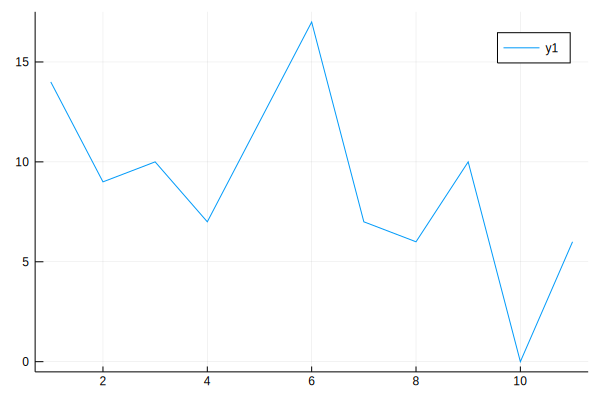

In [78]:
plot(binShift)

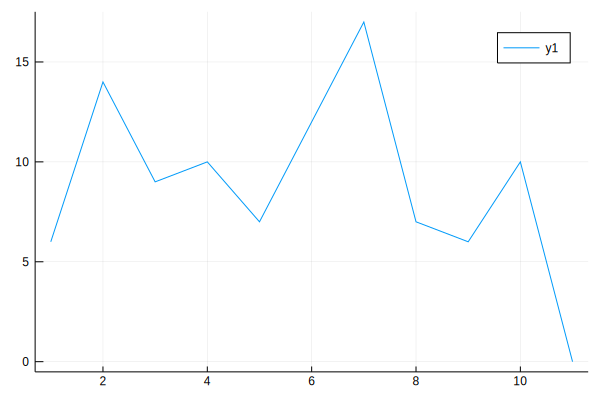

In [76]:
plot(bins)

In [79]:
sum(binShift)==sum(bins)

true

In [67]:
sum(binShift)

98.0

In [63]:
sum(bins)

98.0

In [83]:
binNorm=bins./98

11-element Array{Float64,1}:
 0.061224489795918366
 0.14285714285714285 
 0.09183673469387756 
 0.10204081632653061 
 0.07142857142857142 
 0.12244897959183673 
 0.17346938775510204 
 0.07142857142857142 
 0.061224489795918366
 0.10204081632653061 
 0.0                 

In [84]:
sum(binNorm)

0.9999999999999999

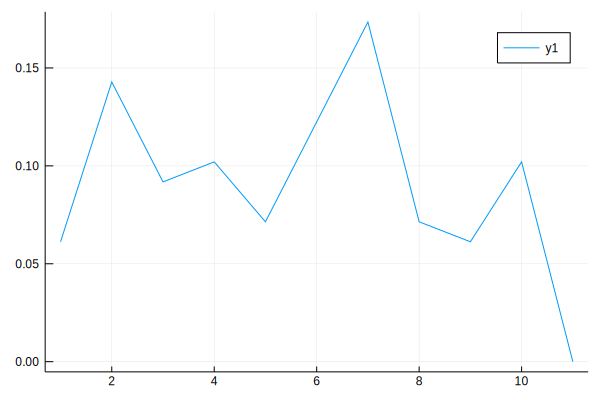

In [85]:
plot(binNorm)